<a href="https://colab.research.google.com/github/AkshayKohad/ML-Tutorial/blob/main/PCA_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [96]:
from sklearn.datasets import load_digits

In [97]:
digits = load_digits()

In [98]:
X = digits['data']

In [99]:
X.shape

(1797, 64)

####Step 1


In [100]:
mu = X.mean(axis=0)
# Mean Centering
X_ = (X-mu)
X_.shape

(1797, 64)

####Step 2

In [101]:
S = np.dot(X_.T,X_)
S.shape

(64, 64)

####Step 3

In [102]:
lambdas,vectors = np.linalg.eig(S)


In [103]:
lambdas.shape

(64,)

In [104]:
lambdas[:2]

array([321496.44645596, 294037.07339949])

In [105]:
vectors.shape

(64, 64)

####Step 4

In [106]:
# Vectors are kept column wise, so if we want 2 features we will do vectors[:,:2]  so it's shape will be (13,2) -> 13 is dimension of 1 vector and we have total of 2 vectors

In [107]:
V = vectors[:,:2]
V.shape

(64, 2)

#### Projection

In [108]:
X_.shape

(1797, 64)

In [109]:
V.shape

(64, 2)

In [110]:
X_new = np.dot(X_,V)
X_new.shape

(1797, 2)

In [111]:
# Now this X_new is projecting the 13 dimensions data into 2 dimensions

In [112]:
X_new[:5]

array([[  1.25946645, -21.27488348],
       [ -7.9576113 ,  20.76869896],
       [ -6.99192297,   9.95598641],
       [ 15.90610526,  -3.33246429],
       [-23.30686741,  -4.26906083]])

In [113]:
total = sum(lambdas)

In [114]:
explained_variance = np.round(lambdas/total,3)
explained_variance

array([0.149, 0.136, 0.118, 0.084, 0.058, 0.049, 0.043, 0.037, 0.034,
       0.031, 0.024, 0.023, 0.018, 0.018, 0.015, 0.014, 0.013, 0.012,
       0.01 , 0.009, 0.009, 0.008, 0.008, 0.007, 0.007, 0.006, 0.006,
       0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [122]:
cummulative_variance = np.cumsum(explained_variance)
cummulative_variance

array([0.149, 0.285, 0.403, 0.487, 0.545, 0.594, 0.637, 0.674, 0.708,
       0.739, 0.763, 0.786, 0.804, 0.822, 0.837, 0.851, 0.864, 0.876,
       0.886, 0.895, 0.904, 0.912, 0.92 , 0.927, 0.934, 0.94 , 0.946,
       0.951, 0.956, 0.96 , 0.964, 0.968, 0.971, 0.974, 0.977, 0.98 ,
       0.983, 0.985, 0.987, 0.989, 0.991, 0.993, 0.995, 0.996, 0.997,
       0.998, 0.999, 1.   , 1.001, 1.001, 1.001, 1.001, 1.001, 1.001,
       1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001, 1.001,
       1.001])

In [123]:
import matplotlib.pyplot as plt

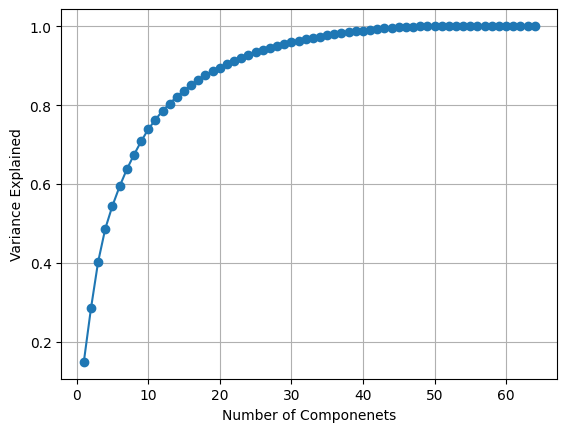

In [126]:
plt.plot(range(1,len(cummulative_variance)+1),cummulative_variance,marker="o")
plt.xlabel("Number of Componenets")
plt.ylabel("Variance Explained")
plt.grid("on")

In [116]:
explained_variance[:2].sum()

0.28500000000000003

## SKLEARN

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(n_components=2)

In [119]:
pca.fit_transform(X)

array([[ -1.25947537,  21.27488371],
       [  7.95760418, -20.7686985 ],
       [  6.99193516,  -9.95598661],
       ...,
       [ 10.8012826 ,  -6.96025289],
       [ -4.87209672,  12.42395586],
       [ -0.34438825,   6.36554912]])

In [120]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [121]:
pca.explained_variance_ratio_.sum

<function ndarray.sum>